In [6]:
import numpy as np
import sounddevice as sd
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

In [23]:
sr=44100
#Function to determine the correct frequencies
def notes_to_freq(n):
    output = np.power(2,((n - 49)/12))*440
    return output
#Determine Note frequency (Note:B6,C6,A6,A5,E6)
note1 = notes_to_freq(47)
note2 = notes_to_freq(49)
note3 = notes_to_freq(45)
note4 = notes_to_freq(33)
note5 = notes_to_freq(40)


In [8]:
#function to create the CETK signal
def generate_CETK_tone(frequency_string):
    # Time array for the sine tones with duration 6 seconds
    time = np.linspace(0, 6, int(sr*6))

    # Generate the sine tone
    CETK_tone = np.sin(2 * np.pi * frequency_string * time)
    # Play the sine tone
    sd.play(CETK_tone, samplerate=sr)
    sd.wait()  # Wait until the sine tone is done playing
    # Save the sine tone to a WAV file
    #write(f'teamKKA-cetk.wav', sr, CETK_tone)

    # Plot the spectrogram of the sine tone
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(CETK_tone)), ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram of Chirp Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.savefig('cetk_spectrogram.png')  # Save spectrogram as PNG image
    plt.show()

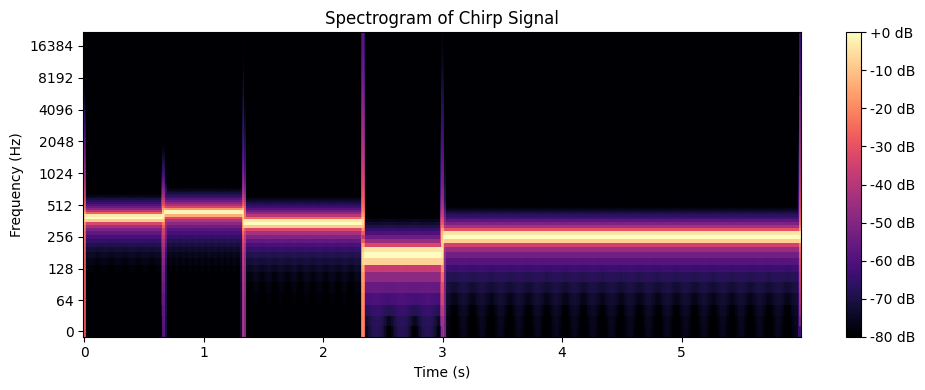

In [30]:
#create array of correct frequencies
total_length = int(sr*6)
divided_length = int(total_length/18)
note1_array = np.full(divided_length*2,note1)
note2_array =np.full(divided_length*2,note2)
note3_array =np.full(divided_length*3,note3)
note4_array =np.full(divided_length*2,note4)
note5_array =np.full(divided_length*9,note5)
frequency_array =  np.concatenate((note1_array,note2_array,note3_array,note4_array,note5_array))
# Generate sine tone with the provided duration
generate_CETK_tone(frequency_array)